In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import feature_extractor as fe
import data_cleaner as dc
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import pandas as pd
# import numpy as np
# sys.path.append('../..')
# import omama as O

In [3]:
# cache_path = "/home/ryan.zurrin001/binlink/sample_dataset.pkl"
cache_path = "/home/ryan.zurrin001/binlink/cs438_features_imgs.pkl"

In [4]:
# Load the DataFrame
df_features = pd.read_pickle(cache_path)

In [5]:
len(df_features)

163568

In [6]:
len(df_features.columns)

36

In [7]:
df_features.columns

Index(['path', 'label', 'StudyInstanceUID', 'ImageLaterality',
       'SOPInstanceUID', 'PatientAge', 'Manufacturer', 'ManufacturerModelName',
       'DistanceSourceToDetector', 'DistanceSourceToPatient', 'ExposureTime',
       'XRayTubeCurrent', 'Exposure', 'ExposureInuAs', 'KVP',
       'BodyPartThickness', 'CompressionForce', 'PositionerPrimaryAngle',
       'ViewPosition', 'DetectorTemperature', 'DetectorType',
       'FieldOfViewOrigin', 'Rows', 'Columns', 'PixelSpacing',
       'BreastImplantPresent', 'WindowCenter', 'WindowWidth', 'HalfValueLayer',
       'original_shape', 'shape', 'coords', 'resized_coords', 'score',
       'histogram', 'image'],
      dtype='object')

In [8]:
columns_to_display = ['label', 'score', 'ImageLaterality', 'PatientAge', 'Manufacturer', 'ManufacturerModelName', 'ExposureTime','WindowCenter', 'coords']

In [9]:
display(df_features[columns_to_display])

,label,score,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter,coords
0,NonCancer,0.114345,R,476M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,654,"[2839, 2863, 2809]","(1986.0, 960.0, 2264.0, 1269.0)"
1,NonCancer,0.244264,L,621M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,962,"[3049, 3079, 3001]","(385.0, 1962.0, 687.0, 2256.0)"
2,Unknown,0.077584,R,876M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,633,"[2743, 2779, 2695]","(1013.0, 1497.0, 1250.0, 1761.0)"
3,Unknown,0.005008,R,401M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,638,"[2845, 2863, 2821]","(1334.0, 1676.0, 1674.0, 2011.0)"
4,NonCancer,0.112289,R,532M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_54.20,858,"[3163, 3211, 3085]","(1782.0, 2036.0, 1897.0, 2155.0)"
...,...,...,...,...,...,...,...,...,...
163563,NonCancer,0.463245,L,739M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,940,"[2785, 2827, 2731]","(572.0, 908.0, 895.0, 1224.0)"
163564,NonCancer,0.201444,L,641M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.10.1.1,1243,"[2635, 2701, 2545]","(260.0, 1701.0, 603.0, 1983.0)"
163565,NonCancer,0.122635,R,724M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,947,"[2131, 2149, 2101]","(1543.0, 596.0, 1752.0, 804.0)"
163566,NonCancer,0.380193,L,382M,GE MEDICAL SYSTEMS,Senographe Essential VERSION ADS_53.40,990,"[2785, 2815, 2743]","(117.0, 1549.0, 348.0, 1762.0)"


In [10]:
cleaner = dc.DataCleaner(df_features)

In [11]:
print("Initial length:", len(cleaner.df))

Initial length: 163568


In [12]:
img_data, cleaned_df = cleaner.clean_data(return_img_mask_data=True)

Cleaning data...
drop unnecessary columns
handle missing values
process ages
label encode
map labels
handle missing values
add correctness column
create binary masks


Processing Data:   0%|          | 0/161299 [00:00<?, ?it/s]

expand and extend columns


Expanding Columns:   0%|          | 0/2 [00:00<?, ?it/s]

Extending Columns:   0%|          | 0/3 [00:00<?, ?it/s]

process and flatten columns
handle missing values
enforce numeric data types


In [13]:
cleaned_df.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'fla

In [14]:
len(cleaned_df.columns)

56

In [15]:
columns_to_display = ['label', 'target_label', 'score', 'ImageLaterality', 'PatientAge', 'Manufacturer', 'ManufacturerModelName', 'ExposureTime', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',  'coords1', 'coords2', 'coords3', 'coords4']

In [16]:
display(cleaned_df[columns_to_display])

,label,target_label,score,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter1,WindowCenter2,WindowCenter3,WindowCenter4,coords1,coords2,coords3,coords4
0,0,1,0.114345,1,39.666667,0,25,654,2839.0,2863.0,2809.0,0.0,1986.0,960.0,2264.0,1269.0
1,0,1,0.244264,0,51.750000,0,22,962,3049.0,3079.0,3001.0,0.0,385.0,1962.0,687.0,2256.0
4,0,1,0.112289,1,44.333333,0,25,858,3163.0,3211.0,3085.0,0.0,1782.0,2036.0,1897.0,2155.0
5,0,1,0.365428,0,75.250000,0,22,1107,2665.0,2713.0,2593.0,0.0,355.0,1127.0,736.0,1456.0
6,0,1,0.064458,1,56.500000,0,19,989,2671.0,2719.0,2611.0,0.0,1297.0,1218.0,1686.0,1534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163563,0,1,0.463245,0,61.583333,0,22,940,2785.0,2827.0,2731.0,0.0,572.0,908.0,895.0,1224.0
163564,0,1,0.201444,0,53.416667,0,19,1243,2635.0,2701.0,2545.0,0.0,260.0,1701.0,603.0,1983.0
163565,0,1,0.122635,1,60.333333,0,22,947,2131.0,2149.0,2101.0,0.0,1543.0,596.0,1752.0,804.0
163566,0,1,0.380193,0,31.833333,0,22,990,2785.0,2815.0,2743.0,0.0,117.0,1549.0,348.0,1762.0


In [17]:
len(cleaned_df)

161299

In [18]:
cleaned_df

,label,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,Exposure,...,histogram_percentile_50,histogram_percentile_75,flattened_image_mean,flattened_image_median,flattened_image_std,flattened_image_min,flattened_image_max,flattened_image_percentile_25,flattened_image_percentile_50,flattened_image_percentile_75
0,0,1,39.666667,0,25,660.0,660.0,654,62,41,...,0.000076,0.000168,58.695709,7.0,82.222314,0,242,6.0,7.0,181.0
1,0,0,51.750000,0,22,660.0,660.0,962,61,60,...,0.000076,0.000290,98.803879,0.0,102.330416,0,246,0.0,0.0,203.0
4,0,1,44.333333,0,25,660.0,660.0,858,62,53,...,0.000107,0.000587,63.388824,14.0,79.600343,0,253,13.0,14.0,178.0
5,0,0,75.250000,0,22,660.0,660.0,1107,62,69,...,0.000076,0.000366,56.863647,0.0,74.328708,0,229,0.0,0.0,149.0
6,0,1,56.500000,0,19,660.0,660.0,989,62,61,...,0.000122,0.001701,84.603943,138.0,76.137374,0,205,5.0,138.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163563,0,0,61.583333,0,22,660.0,660.0,940,61,58,...,0.000061,0.000175,56.462296,7.0,73.238716,0,228,6.0,7.0,159.0
163564,0,0,53.416667,0,19,660.0,660.0,1243,60,75,...,0.000122,0.000473,74.738174,0.0,89.472290,0,245,0.0,0.0,177.0
163565,0,1,60.333333,0,22,660.0,660.0,947,62,59,...,0.000107,0.000595,47.728088,5.0,70.445899,0,246,4.0,5.0,144.0
163566,0,0,31.833333,0,22,660.0,660.0,990,61,62,...,0.000061,0.000153,53.578430,2.0,89.580247,0,250,1.0,2.0,79.0


In [19]:
cleaned_df.iloc[4]

label                                0.000000
ImageLaterality                      1.000000
PatientAge                          56.500000
Manufacturer                         0.000000
ManufacturerModelName               19.000000
DistanceSourceToDetector           660.000000
DistanceSourceToPatient            660.000000
ExposureTime                       989.000000
XRayTubeCurrent                     62.000000
Exposure                            61.000000
ExposureInuAs                    61400.000000
KVP                                 29.000000
BodyPartThickness                   56.000000
CompressionForce                    90.000000
PositionerPrimaryAngle              54.000000
ViewPosition                         1.000000
DetectorTemperature                 30.394600
DetectorType                         1.000000
Rows                              3062.000000
Columns                           2394.000000
score                                0.064458
target_label                      

In [20]:
len(cleaned_df)

161299

In [21]:
len(img_data)

161299

In [22]:
idx = 6

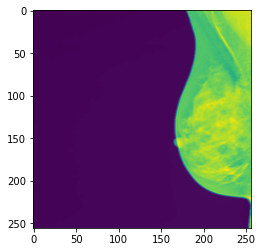

In [23]:
imshow(img_data[idx, :, :, 0] )

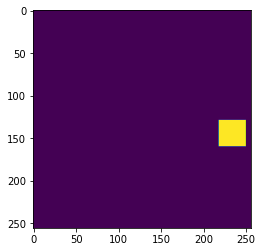

In [24]:
imshow(img_data[idx, :, :, 1] )

               label  ImageLaterality     PatientAge   Manufacturer  \
count  161299.000000    161299.000000  161299.000000  161299.000000   
mean        0.043987         0.501131      51.839671       0.140466   
std         0.205066         0.500000      11.663761       0.497426   
min         0.000000         0.000000       8.666667       0.000000   
25%         0.000000         0.000000      43.250000       0.000000   
50%         0.000000         1.000000      51.750000       0.000000   
75%         0.000000         1.000000      60.000000       0.000000   
max         1.000000         1.000000      80.083333       5.000000   

       ManufacturerModelName  DistanceSourceToDetector  \
count          161299.000000             161299.000000   
mean               19.698132                660.213269   
std                 5.594877                  2.912956   
min                 0.000000                660.000000   
25%                19.000000                660.000000   
50%         

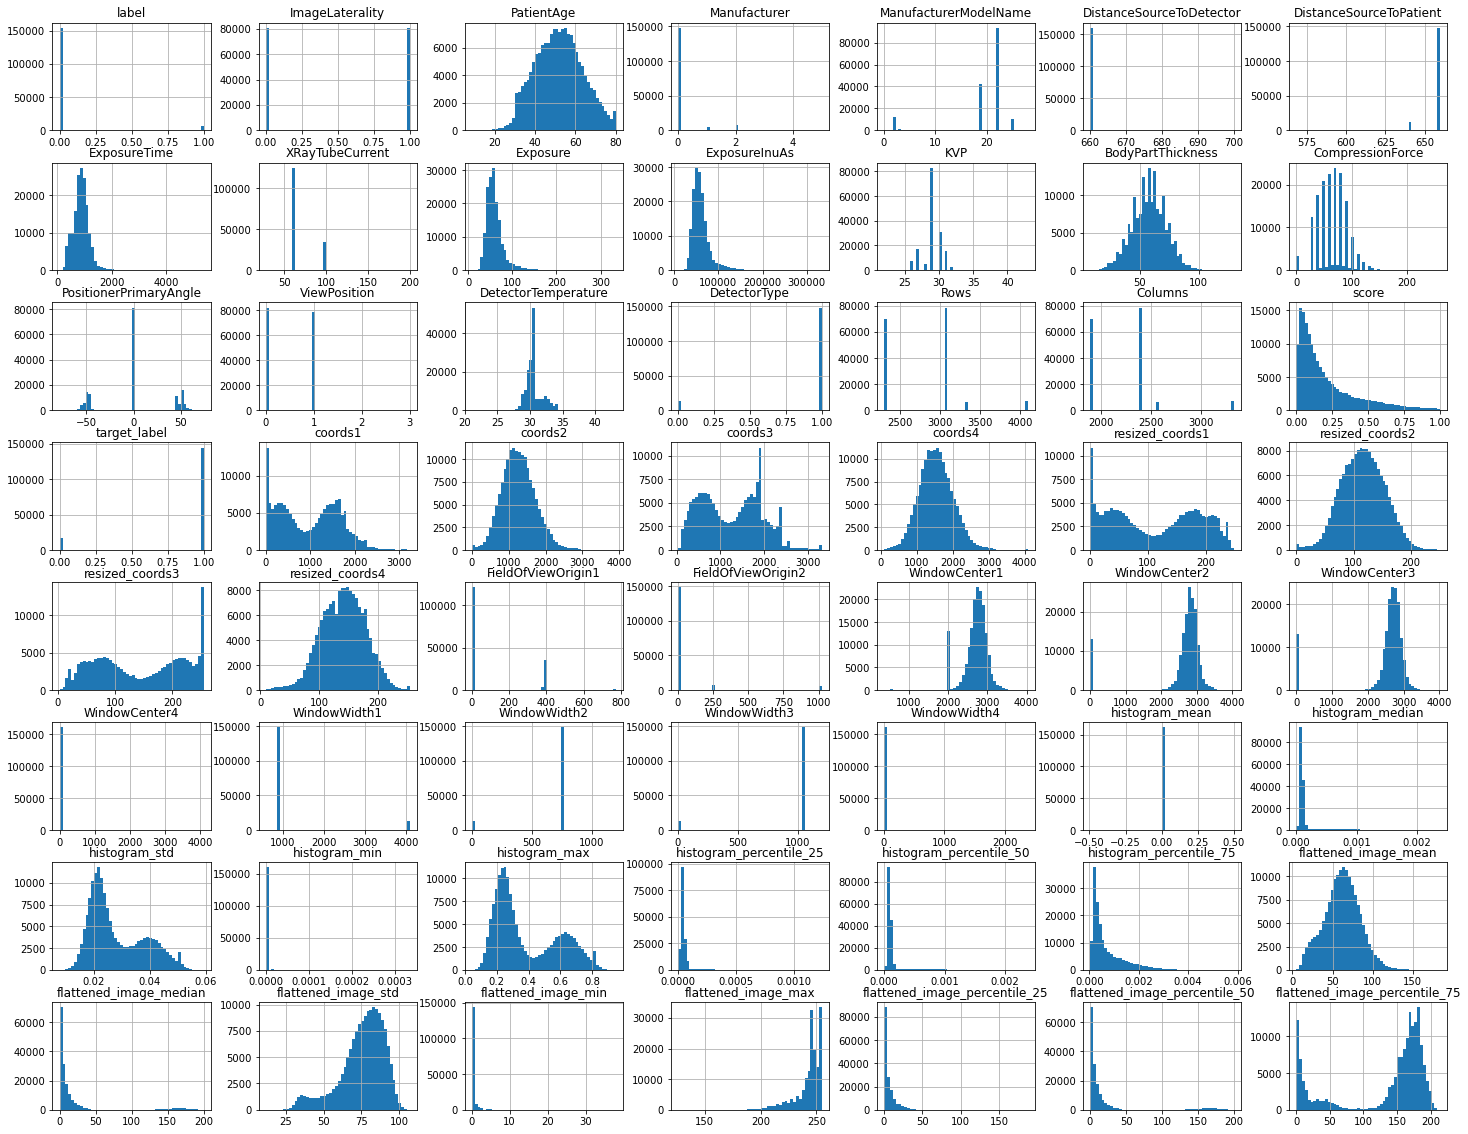

In [25]:
# Descriptive statistics
print(cleaned_df.describe())

# Histograms for feature distribution
cleaned_df.hist(bins=50, figsize=(25,20))
plt.show()


In [ ]:
# Select a subset of features for clarity
# 'label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
#        'ManufacturerModelName', 'DistanceSourceToDetector',
#        'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
#        'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
#        'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
#        'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
#        'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
#        'resized_coords1', 'resized_coords2', 'resized_coords3',
#        'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
#        'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
#        'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
#        'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
#        'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
#        'histogram_percentile_75', 'flattened_image_mean',
#        'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
#        'flattened_image_max', 'flattened_image_percentile_25',
#        'flattened_image_percentile_50', 'flattened_image_percentile_75'

subset_of_features = [
    'label', 'ImageLaterality','PatientAge', 'Manufacturer',
    'ManufacturerModelName', 'DistanceSourceToDetector',
    'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
    'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
    'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
#     'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
#     'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
#     'resized_coords1', 'resized_coords2', 'resized_coords3',
#     'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
#     'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
#     'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
#     'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
#     'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
#     'histogram_percentile_75', 'flattened_image_mean',
#     'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
#     'flattened_image_max', 'flattened_image_percentile_25',
#     'flattened_image_percentile_50', 'flattened_image_percentile_75'
]

# Plot histograms for the subset of features
cleaned_df[subset_of_features].hist(bins=50, figsize=(25,20))
plt.show()

# Plot density plots for the subset of features
cleaned_df[subset_of_features].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(25,20))
plt.show()

# Box plots for the subset of features
cleaned_df[subset_of_features].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(25,20))
plt.show()


In [ ]:
corr_matrix = cleaned_df.corr()

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = cleaned_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(35, 35))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap='coolwarm', square=True, cbar_kws={"shrink": .7},
            linewidths=.5)

# Rotate feature labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


In [ ]:
# Select only the numeric columns for KDE plot
numeric_features = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()

# # Adjust the figure size and layout as needed
# fig, axes = plt.subplots(nrows=len(numeric_features), ncols=2, figsize=(10, len(numeric_features)*2))

# for i, feature in enumerate(numeric_features):
#     # Before scaling
#     sns.kdeplot(cleaned_df[feature], ax=axes[i, 0])
#     axes[i, 0].set_title(f'Before Scaling: {feature}')
    
#     # After scaling
#     sns.kdeplot(scaled_features_df[feature], ax=axes[i, 1])
#     axes[i, 1].set_title(f'After Standard Scaler: {feature}')

# plt.tight_layout()
# plt.show()


In [ ]:
len(numeric_features)

In [ ]:
numeric_features

label                                 2
ImageLaterality                       2
PatientAge                          775
Manufacturer                          6
ManufacturerModelName                29
** DistanceSourceToDetector              2
** DistanceSourceToPatient              77
** ExposureTime                       2480
** XRayTubeCurrent                      46
** Exposure                            281
ExposureInuAs                      2311
KVP                                  21
BodyPartThickness                   118
CompressionForce                    541
PositionerPrimaryAngle              269
ViewPosition                          4
DetectorTemperature                 765
DetectorType                          2
Rows                                  5
Columns                               6
score                            160895
target_label                          2
coords1                            2641
coords2                            2846
coords3                            2673
coords4                            2901
resized_coords1                     250
resized_coords2                     251
resized_coords3                     250
resized_coords4                     247
FieldOfViewOrigin1                    7
FieldOfViewOrigin2                   43
WindowCenter1                       487
WindowCenter2                       487
WindowCenter3                       496
WindowCenter4                       352
WindowWidth1                          8
WindowWidth2                          7
WindowWidth3                          7
WindowWidth4                        270
histogram_mean                        1
histogram_median                    146
histogram_std                    161285
histogram_min                        16
histogram_max                     42798
histogram_percentile_25             138
histogram_percentile_50             146
histogram_percentile_75             604
flattened_image_mean             158823
flattened_image_median              355
flattened_image_std              161296
flattened_image_min                  36
flattened_image_max                 100
flattened_image_percentile_25       132
flattened_image_percentile_50       355
flattened_image_percentile_75       428

In [ ]:
type(cleaned_df.iloc[0]['DetectorTemperature'])

In [ ]:
cleaned_df.iloc[0]['DetectorTemperature']

In [ ]:
# Display data types of all columns
print(cleaned_df.dtypes)

# Identify non-numeric columns
non_numeric_columns = cleaned_df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Print the unique values for non-numeric columns
for col in non_numeric_columns:
    print(f"Unique values in '{col}':", cleaned_df[col].unique())


In [ ]:
# Convert non-numeric columns to numeric if possible
for col in non_numeric_columns:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')


In [ ]:
# Verify the conversion
print(cleaned_df.dtypes)


In [ ]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

# Assuming `cleaned_df` is your DataFrame and it's already loaded

# Define the features to scale (exclude 'target_label' and 'label')
features_to_scale = cleaned_df.drop(columns=['target_label', 'label']).columns

# Apply StandardScaler to these features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_df[features_to_scale])

# Convert the scaled features back into a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Now you have your scaled features in a DataFrame `scaled_features_df`

# Plotting the distributions before and after scaling
fig, axes = plt.subplots(nrows=len(features_to_scale), ncols=2, figsize=(10, len(features_to_scale)*2))

for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.kdeplot(cleaned_df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    
    # After scaling
    sns.kdeplot(scaled_features_df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Standard Scaler: {feature}')

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming 'cleaned_df' is your DataFrame and it has been preprocessed correctly
features_to_scale = cleaned_df.columns.drop(['label', 'target_label'])  # Exclude non-feature columns

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the features, transform them and create a new DataFrame with the scaled features
scaled_features = scaler.fit_transform(cleaned_df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Set the number of rows for the subplots based on the number of features
n_rows = len(features_to_scale)

# Create a figure with subplots in two columns
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(10, 2*n_rows))

# Plot each feature before and after scaling
for i, feature in enumerate(features_to_scale):
    # Plot before scaling
    sns.kdeplot(cleaned_df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    axes[i, 0].set_xlim(cleaned_df[feature].min(), cleaned_df[feature].max())  # Set the x-axis limits

    # Plot after scaling
    sns.kdeplot(scaled_df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')
    axes[i, 1].set_xlim(scaled_df[feature].min(), scaled_df[feature].max())  # Set the x-axis limits

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


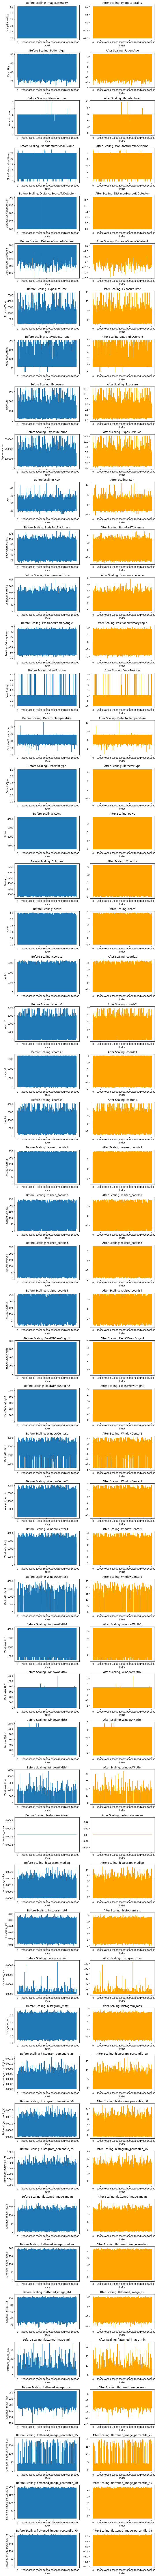

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'cleaned_df' is your DataFrame and it's already loaded

# Select features to scale, excluding 'label' and 'target_label'
features_to_scale = [col for col in cleaned_df.columns if col not in ['label', 'target_label']]

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(cleaned_df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Set the number of rows for subplots based on the number of features
n_rows = len(features_to_scale)

# Create a figure with two subplots - one for before scaling and one for after scaling
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 3*n_rows))  # Adjust figsize as needed

# Plot before scaling
for i, feature in enumerate(features_to_scale):
    sns.lineplot(data=cleaned_df, x=cleaned_df.index, y=feature, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')
    axes[i, 0].set_ylabel(feature)
    axes[i, 0].set_xlabel('Index')

# Plot after scaling
for i, feature in enumerate(features_to_scale):
    sns.lineplot(data=scaled_df, x=scaled_df.index, y=feature, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'After Scaling: {feature}')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlabel('Index')

# Adjust the layout
plt.tight_layout()
plt.show()


In [28]:
scaled_df

,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,Exposure,ExposureInuAs,...,histogram_percentile_50,histogram_percentile_75,flattened_image_mean,flattened_image_median,flattened_image_std,flattened_image_min,flattened_image_max,flattened_image_percentile_25,flattened_image_percentile_50,flattened_image_percentile_75
0,0.997740,-1.043664,-0.282386,0.947632,-0.073214,0.281058,-0.735180,-0.476663,-0.896860,-0.911028,...,-0.337209,-0.801928,-0.141674,-0.257536,0.453604,-0.237151,-0.087892,0.021801,-0.257536,0.724471
1,-1.002265,-0.007688,-0.282386,0.411425,-0.073214,0.281058,0.251884,-0.535434,-0.012056,-0.021162,...,-0.337209,-0.620968,1.666368,-0.432808,1.798547,-0.237151,0.238795,-0.635702,-0.432808,1.050953
2,0.997740,-0.643563,-0.282386,0.947632,-0.073214,0.281058,-0.081410,-0.476663,-0.338037,-0.323996,...,-0.183502,-0.179880,0.069887,-0.082264,0.278232,-0.237151,0.810499,0.788889,-0.082264,0.679950
3,-1.002265,2.007106,-0.282386,0.411425,-0.073214,0.281058,0.716573,-0.476663,0.407061,0.398147,...,-0.337209,-0.507869,-0.224262,-0.432808,-0.074365,-0.237151,-1.149627,-0.635702,-0.432808,0.249587
4,0.997740,0.399558,-0.282386,-0.124781,-0.073214,0.281058,0.338412,-0.476663,0.034512,0.053382,...,-0.106649,1.471374,1.026247,3.022560,0.046609,-0.237151,-3.109753,-0.087783,3.022560,0.353468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161294,-1.002265,0.835382,-0.282386,0.411425,-0.073214,0.281058,0.181379,-0.535434,-0.105194,-0.086387,...,-0.414062,-0.790618,-0.242355,-0.257536,-0.147270,-0.237151,-1.231299,0.021801,-0.257536,0.397988
161295,-1.002265,0.135205,-0.282386,-0.124781,-0.073214,0.281058,1.152420,-0.594206,0.686473,0.673027,...,-0.106649,-0.349529,0.581506,-0.432808,0.938523,-0.237151,0.157123,-0.635702,-0.432808,0.665110
161296,0.997740,0.728212,-0.282386,0.411425,-0.073214,0.281058,0.203813,-0.476663,-0.058625,-0.067751,...,-0.183502,-0.168570,-0.636085,-0.307614,-0.334069,-0.237151,0.238795,-0.197367,-0.307614,0.175387
161297,-1.002265,-1.715261,-0.282386,0.411425,-0.073214,0.281058,0.341617,-0.535434,0.081081,0.058041,...,-0.414062,-0.824548,-0.372357,-0.382730,0.945744,-0.237151,0.565483,-0.526119,-0.382730,-0.789220


In [34]:
columns_to_display = ['score', 'target_label', 'ImageLaterality', 'PatientAge', 'Manufacturer', 'ManufacturerModelName', 'ExposureTime', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',  'coords1', 'coords2', 'coords3', 'coords4']

In [35]:
display(scaled_df[columns_to_display])

,score,target_label,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter1,WindowCenter2,WindowCenter3,WindowCenter4,coords1,coords2,coords3,coords4
0,-0.462232,1.0,0.997740,-1.043664,-0.282386,0.947632,-0.735180,0.417724,0.347611,0.407597,-0.055636,1.487610,-0.676353,1.460802,-0.573381
1,0.171699,1.0,-1.002265,-0.007688,-0.282386,0.411425,0.251884,1.122172,0.618565,0.656763,-0.055636,-0.876853,1.519732,-0.839007,1.516434
2,-0.472268,NaN,0.997740,-0.643563,-0.282386,0.947632,-0.081410,1.504587,0.784148,0.765773,-0.055636,1.186329,1.681918,0.925590,1.302583
3,0.762912,NaN,-1.002265,2.007106,-0.282386,0.411425,0.716573,-0.165961,0.159449,0.127286,-0.055636,-0.921159,-0.310339,-0.767548,-0.177438
4,-0.705654,1.0,0.997740,0.399558,-0.282386,-0.124781,0.338412,-0.145834,0.166975,0.150645,-0.055636,0.470049,-0.110894,0.617879,-0.012285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161294,1.240203,1.0,-1.002265,0.835382,-0.282386,0.411425,0.181379,0.236581,0.302452,0.306374,-0.055636,-0.600679,-0.790322,-0.535671,-0.668661
161295,-0.037238,1.0,-1.002265,0.135205,-0.282386,-0.124781,1.152420,-0.266597,0.144396,0.064994,-0.055636,-1.061462,0.947698,-0.961508,0.938400
161296,-0.421785,1.0,0.997740,0.728212,-0.282386,0.411425,0.203813,-1.957272,-0.548042,-0.511202,-0.055636,0.833358,-1.474133,0.714130,-1.557944
161297,0.834956,1.0,-1.002265,-1.715261,-0.282386,0.411425,0.341617,0.236581,0.287399,0.321946,-0.055636,-1.272654,0.614559,-1.333386,0.470468


In [36]:
display(cleaned_df[columns_to_display])

,score,target_label,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,ExposureTime,WindowCenter1,WindowCenter2,WindowCenter3,WindowCenter4,coords1,coords2,coords3,coords4
0,0.114345,1,1,39.666667,0,25,654,2839.0,2863.0,2809.0,0.0,1986.0,960.0,2264.0,1269.0
1,0.244264,1,0,51.750000,0,22,962,3049.0,3079.0,3001.0,0.0,385.0,1962.0,687.0,2256.0
4,0.112289,1,1,44.333333,0,25,858,3163.0,3211.0,3085.0,0.0,1782.0,2036.0,1897.0,2155.0
5,0.365428,1,0,75.250000,0,22,1107,2665.0,2713.0,2593.0,0.0,355.0,1127.0,736.0,1456.0
6,0.064458,1,1,56.500000,0,19,989,2671.0,2719.0,2611.0,0.0,1297.0,1218.0,1686.0,1534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163563,0.463245,1,0,61.583333,0,22,940,2785.0,2827.0,2731.0,0.0,572.0,908.0,895.0,1224.0
163564,0.201444,1,0,53.416667,0,19,1243,2635.0,2701.0,2545.0,0.0,260.0,1701.0,603.0,1983.0
163565,0.122635,1,1,60.333333,0,22,947,2131.0,2149.0,2101.0,0.0,1543.0,596.0,1752.0,804.0
163566,0.380193,1,0,31.833333,0,22,990,2785.0,2815.0,2743.0,0.0,117.0,1549.0,348.0,1762.0


In [ ]:
# Select a subset of features for clarity
# 'label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
#        'ManufacturerModelName', 'DistanceSourceToDetector',
#        'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
#        'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
#        'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
#        'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
#        'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
#        'resized_coords1', 'resized_coords2', 'resized_coords3',
#        'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
#        'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
#        'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
#        'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
#        'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
#        'histogram_percentile_75', 'flattened_image_mean',
#        'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
#        'flattened_image_max', 'flattened_image_percentile_25',
#        'flattened_image_percentile_50', 'flattened_image_percentile_75'

subset_of_features = [
    'ImageLaterality','PatientAge', 'Manufacturer',
    'ManufacturerModelName', 'DistanceSourceToDetector',
    'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
    'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
    'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
#     'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
#     'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
#     'resized_coords1', 'resized_coords2', 'resized_coords3',
#     'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
#     'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
#     'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
#     'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
#     'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
#     'histogram_percentile_75', 'flattened_image_mean',
#     'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
#     'flattened_image_max', 'flattened_image_percentile_25',
#     'flattened_image_percentile_50', 'flattened_image_percentile_75'
]

# Plot histograms for the subset of features
scaled_df[subset_of_features].hist(bins=50, figsize=(25,20))
plt.show()

# Plot density plots for the subset of features
scaled_df[subset_of_features].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(25,20))
plt.show()

# Box plots for the subset of features
scaled_df[subset_of_features].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(25,20))
plt.show()

In [37]:
target_label = list(cleaned_df.loc[:, "target_label"])

In [39]:
# Assume scaled_df is your scaled dataframe and target_label is the target label series.

# First, add the target_label series as the last column in the scaled dataframe
scaled_df['target_label'] = target_label




In [40]:
scaled_df

,ImageLaterality,PatientAge,Manufacturer,ManufacturerModelName,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,Exposure,ExposureInuAs,...,histogram_percentile_75,flattened_image_mean,flattened_image_median,flattened_image_std,flattened_image_min,flattened_image_max,flattened_image_percentile_25,flattened_image_percentile_50,flattened_image_percentile_75,target_label
0,0.997740,-1.043664,-0.282386,0.947632,-0.073214,0.281058,-0.735180,-0.476663,-0.896860,-0.911028,...,-0.801928,-0.141674,-0.257536,0.453604,-0.237151,-0.087892,0.021801,-0.257536,0.724471,1
1,-1.002265,-0.007688,-0.282386,0.411425,-0.073214,0.281058,0.251884,-0.535434,-0.012056,-0.021162,...,-0.620968,1.666368,-0.432808,1.798547,-0.237151,0.238795,-0.635702,-0.432808,1.050953,1
2,0.997740,-0.643563,-0.282386,0.947632,-0.073214,0.281058,-0.081410,-0.476663,-0.338037,-0.323996,...,-0.179880,0.069887,-0.082264,0.278232,-0.237151,0.810499,0.788889,-0.082264,0.679950,1
3,-1.002265,2.007106,-0.282386,0.411425,-0.073214,0.281058,0.716573,-0.476663,0.407061,0.398147,...,-0.507869,-0.224262,-0.432808,-0.074365,-0.237151,-1.149627,-0.635702,-0.432808,0.249587,1
4,0.997740,0.399558,-0.282386,-0.124781,-0.073214,0.281058,0.338412,-0.476663,0.034512,0.053382,...,1.471374,1.026247,3.022560,0.046609,-0.237151,-3.109753,-0.087783,3.022560,0.353468,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161294,-1.002265,0.835382,-0.282386,0.411425,-0.073214,0.281058,0.181379,-0.535434,-0.105194,-0.086387,...,-0.790618,-0.242355,-0.257536,-0.147270,-0.237151,-1.231299,0.021801,-0.257536,0.397988,1
161295,-1.002265,0.135205,-0.282386,-0.124781,-0.073214,0.281058,1.152420,-0.594206,0.686473,0.673027,...,-0.349529,0.581506,-0.432808,0.938523,-0.237151,0.157123,-0.635702,-0.432808,0.665110,1
161296,0.997740,0.728212,-0.282386,0.411425,-0.073214,0.281058,0.203813,-0.476663,-0.058625,-0.067751,...,-0.168570,-0.636085,-0.307614,-0.334069,-0.237151,0.238795,-0.197367,-0.307614,0.175387,1
161297,-1.002265,-1.715261,-0.282386,0.411425,-0.073214,0.281058,0.341617,-0.535434,0.081081,0.058041,...,-0.824548,-0.372357,-0.382730,0.945744,-0.237151,0.565483,-0.526119,-0.382730,-0.789220,1


In [41]:
# Now, save the dataframe as a pickle file
scaled_df.to_pickle('/home/ryan.zurrin001/binlink/scaled_df.pkl')

# And save the dataframe as a CSV file
scaled_df.to_csv('/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/CS438/labels/scaled_df.csv', index=False)

In [ ]:
len(scaled_df)

In [ ]:
len(cleaned_df)

In [ ]:
cleaned_df.columns

In [ ]:
csv_path = "/home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/CS438/labels/feature_labels_wrong.csv"

In [ ]:
cleaned_df.to_csv(csv_path, index=False)

In [ ]:
unique_values = cleaned_df.nunique()

print("Number of unique values per column:")
print(unique_values)

In [ ]:
# Assuming `df` is your DataFrame and 'target_label' is your column of interest
count_of_values = scaled_df['target_label'].value_counts()

# This will print the count of each unique value in the 'target_label' column
print(count_of_values)

In [ ]:
len(unique_values)

In [ ]:
cleaned_df = scaled_df

In [ ]:
# Define your features and target variable
X = scaled_df.drop('target_label', axis=1)  # all columns except the label
y = scaled_df['target_label']  # the target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

In [ ]:
y

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_train_scaled

In [ ]:
# X_test_scaled

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Initialize RFE
rfe = RFE(estimator=log_reg, n_features_to_select=10)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Print the features ranked by importance
ranking = rfe.ranking_
features = cleaned_df.columns.to_list()
ranked_features = sorted(zip(ranking, features))
print(ranked_features)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # Initialize the model
# log_reg = LogisticRegression()

# # Initialize RFE
# rfe = RFE(estimator=log_reg, n_features_to_select=10)

# # Fit RFE
# rfe.fit(X_train_scaled, y_train)

# # Print the features ranked by importance
# ranking = rfe.ranking_
# features = cleaned_df.columns.to_list()
# ranked_features = sorted(zip(ranking, features))
# print(ranked_features)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

model = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Calculate class weights for binary classification
# weight_for_0 = (1 / count_of_values[0]) * (len(cleaned_df) / 2.0)
# weight_for_1 = (1 / count_of_values[1]) * (len(cleaned_df) / 2.0)

# class_weights = {0: weight_for_0, 1: weight_for_1}

# model2 = RandomForestClassifier(class_weight=class_weights, random_state=42)
# model2.fit(X_train_scaled, y_train)

In [ ]:
# # Predict on the test data
# y_pred = model2.predict(X_test_scaled)

# # Evaluate the model
# print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Calculate class weights
# class_weights = {0: 1,
#                  1: (len(y_train) - sum(y_train)) / sum(y_train)}

# model = RandomForestClassifier(class_weight=class_weights, random_state=42)
# model.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()
